# This notebook wil process an images in a directory structure shown below that matches a binary classification (fracture / no fracture) scenario and create augmented images in a new directory as shown in the exmaple below

/dataset/categorised_images/train/fracture
/dataset/categorised_images/train/no_fracture

/dataset/categorised_images/valid/fracture
/dataset/categorised_images/valid/no_fracture

/dataset/categorised_images/test/fracture
/dataset/categorised_images/test/no_fracture

->

/augmented_images/categorised_images/train/fracture 
/augmented_images/categorised_images/train/no_fracture

/augmented_images/categorised_images/valid/fracture
/augmented_images/categorised_images/valid/no_fracture

/augmented_images/categorised_images/test/fracture
/augmented_images/categorised_images/test/no_fracture
 

In [1]:
#imports
from os import path, makedirs, walk, listdir, remove
import pandas as pd
from keras import layers
import matplotlib.pyplot as plt
from keras.utils import save_img
from keras.utils import image_dataset_from_directory
from shutil import copyfile
import ipynbname
import numpy as np

In [2]:
drive_dir_colab = '/content/drive/MyDrive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/datasets'

DATASET_NAMES = ('train','valid','test')
CLASS_DIRECTORY_NAMES = ('class_fracture','class_no_fracture')
DATASET_DIRECTORY = 'dataset'
TOP_DIRECTORY_CLASSIFIFICATIONS = path.join(DATASET_DIRECTORY ,'categorised_images')
SOURCE_DATASET_DIRECTORY = path.join(DATASET_DIRECTORY, 'categorised_images/')
AUGMENTED_DATASET_DIRECTORY = path.join('augmented_images/', 'categorised_images/')
AUGMENTATION_LAYERS = [layers.RandomFlip("horizontal"), layers.RandomRotation(0.2), layers.RandomZoom(0.2), layers.RandomContrast(0.2)]
NUMBER_OF_AUGMENTATIONS = 4

#notebook attributes
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

2024-03-25 18:04:26.098935: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-03-25 18:04:26.098957: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-25 18:04:26.098964: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-25 18:04:26.098984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-25 18:04:26.098997: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [53]:
def categorise_images(a_dataset_name):
    #creates a directory structure  like: images/
    #                                       class0/*.jpg
    #                                       class1/*.jpg
    #and copies the images into either leaf directory depending on their class label
    #this puts the data into a format that keras can load into a dataset

    fracture_directory = path.join(TOP_DIRECTORY_CLASSIFIFICATIONS, a_dataset_name,CLASS_DIRECTORY_NAMES[0])
    print('fracture_directory', fracture_directory)
    no_fracture_directory = path.join(TOP_DIRECTORY_CLASSIFIFICATIONS,a_dataset_name,CLASS_DIRECTORY_NAMES[-1])
    print('no_fracture_directory', no_fracture_directory)

    if path.exists(fracture_directory) == False:  
        makedirs(fracture_directory) 
    if path.exists(no_fracture_directory) == False:  
        makedirs(no_fracture_directory) 

    #read labels into pandas df
    csv_filepath = path.join(DATASET_DIRECTORY, a_dataset_name, 'labels/labels.csv')
    print('csv_filepath', csv_filepath)
    df = pd.read_csv(path.join(csv_filepath))
    df = df.set_index('filename')

    #walk through files and copy file to relevant directory
    images_dir = path.join(DATASET_DIRECTORY,a_dataset_name,'images')
    print('images_dir', images_dir)
    filenames = []
    for (dirpath, dirnames, filenames) in walk(images_dir):
        filenames.extend(filenames)
 
    for filename in filenames:
        #ignore mac os system file
        if filename.endswith('.DS_Store'):
            pass
        elif df.loc[filename]['target'] == 1:
            destination = path.join(fracture_directory, filename)
        else:
            destination = path.join(no_fracture_directory, filename)
        source = path.join(images_dir, filename)
        copyfile(source, destination)

In [54]:
for dataset_name in DATASET_NAMES:
    categorise_images(dataset_name)

fracture_directory /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/datasets/binary_classification/categorised_images/train/class_fracture
no_fracture_directory /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/datasets/binary_classification/categorised_images/train/class_no_fracture
csv_filepath /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/datasets/binary_classification/train/labels/labels.csv
images_dir /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/datasets/binary_cla

In [3]:
def find_and_remove_non_jpg_files(a_folder_path):
    #removes any non-jpg files in the provided directory
    num_skipped = 0
    for fname in listdir(a_folder_path):
        fpath = path.join(a_folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            print('removing non-image file: ' + fpath)
            remove(fpath)

    print(f"Deleted {num_skipped} files.")

In [4]:
#rmeove any non-processable files form the image directories
folders_checked = 0
for dataset_name in DATASET_NAMES:
    for class_dir_name in CLASS_DIRECTORY_NAMES:
        folder_path = path.join(TOP_DIRECTORY_CLASSIFIFICATIONS, dataset_name,class_dir_name)
        print('checking folder: '+folder_path)
        #check_for_corrupted_images(folder_path)
        find_and_remove_non_jpg_files(folder_path)
        folders_checked +=1
print('checked', folders_checked, 'folders')

checking folder: dataset/categorised_images/train/class_fracture
Deleted 0 files.
checking folder: dataset/categorised_images/train/class_no_fracture
Deleted 0 files.
checking folder: dataset/categorised_images/valid/class_fracture
Deleted 0 files.
checking folder: dataset/categorised_images/valid/class_no_fracture
Deleted 0 files.
checking folder: dataset/categorised_images/test/class_fracture
Deleted 0 files.
checking folder: dataset/categorised_images/test/class_no_fracture
Deleted 0 files.
checked 6 folders


In [5]:
def load_images(a_dataset_directory, batch_size):
        
    return image_dataset_from_directory(
        directory=a_dataset_directory,
        labels='inferred',
        label_mode="binary",
        color_mode="grayscale",
        batch_size=batch_size,
        image_size=(256, 256),
        shuffle=False,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation="bilinear",
        follow_links=False
    )   

In [6]:
#load the datasets
train_ds_directory = path.join(TOP_DIRECTORY_CLASSIFIFICATIONS, 'train')
valid_ds_directory = path.join(TOP_DIRECTORY_CLASSIFIFICATIONS, 'valid')
test_ds_directory = path.join(TOP_DIRECTORY_CLASSIFIFICATIONS, 'test')
train_ds = load_images(train_ds_directory, None)
valid_ds= load_images(valid_ds_directory, None)
test_ds= load_images(test_ds_directory, None)

Found 3630 files belonging to 2 classes.
Found 348 files belonging to 2 classes.
Found 169 files belonging to 2 classes.


/var/folders/hx/dd8ztyfj5jldv20g1884d4xc0000gn/T/ipykernel_14923/2713289997.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('Original image, label = ' + str(int(label.numpy())))


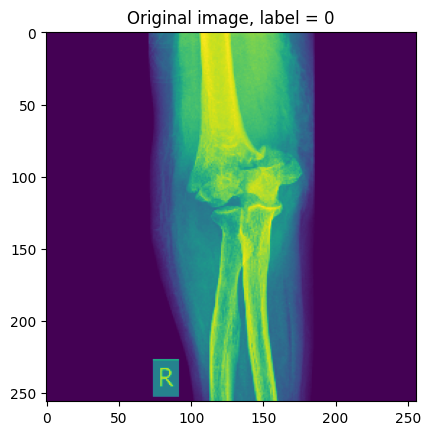

/var/folders/hx/dd8ztyfj5jldv20g1884d4xc0000gn/T/ipykernel_14923/2713289997.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('Augmented image, label = ' + str(int(label.numpy())))


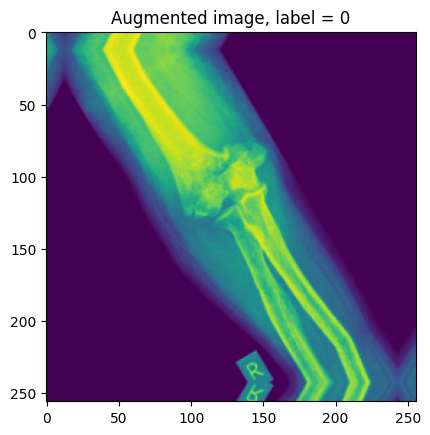

2024-03-25 18:23:22.636258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
#display some an original image
for image, label in train_ds.take(1):
    plt.imshow(image)
    plt.title('Original image, label = ' + str(int(label.numpy())))
    plt.show()
    for layer in AUGMENTATION_LAYERS:
        image = layer(image)
    plt.imshow(image)
    plt.title('Augmented image, label = ' + str(int(label.numpy())))
    plt.show()

2024-03-25 09:35:19.577028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


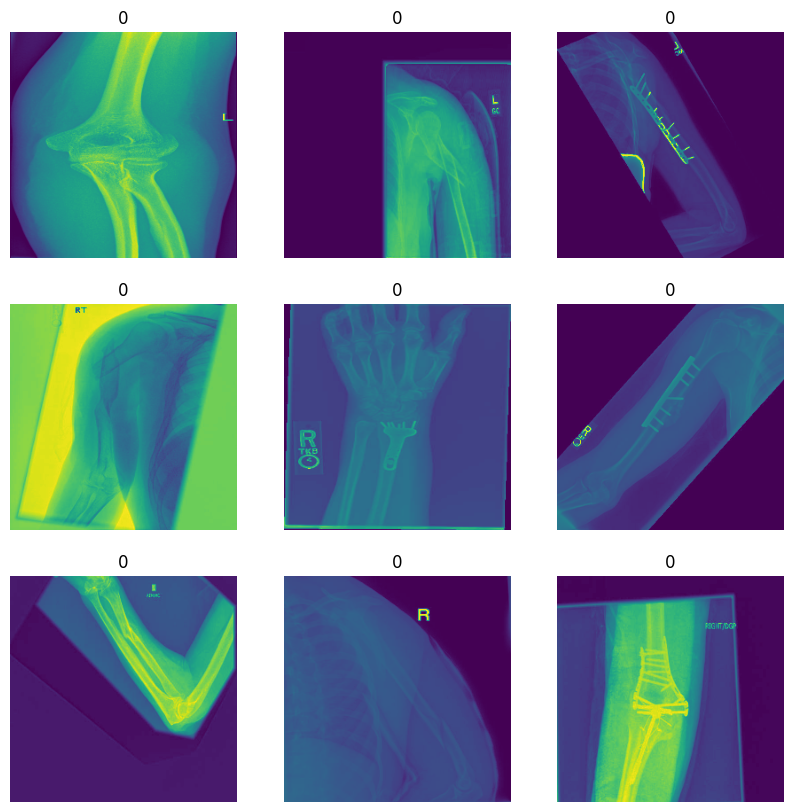

In [14]:
#display some original images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(test_ds.take(9)):
    label_1 = int(label)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label_1)
    plt.axis("off")

In [19]:
def data_augmentation(image):
    #function for performing the augmentation
    for layer in AUGMENTATION_LAYERS:
        image = layer(image)
    return image

In [22]:
def create_and_save_augmentations(dataset, destination_image_directory):
    #function to create the augmented images and write them to file.
    
    #create the destination directories if they do not already exist
    fracture_directory = path.join(destination_image_directory, CLASS_DIRECTORY_NAMES[0])
    print('fracture_directory', fracture_directory)
    no_fracture_directory = path.join(destination_image_directory, CLASS_DIRECTORY_NAMES[-1])
    print('no_fracture_directory', no_fracture_directory)

    if path.exists(fracture_directory) == False:  
        makedirs(fracture_directory) 
    if path.exists(no_fracture_directory) == False:  
        makedirs(no_fracture_directory) 
    
    file_name_index = 1
    for image, label in dataset:
        for augmentation_count in range(NUMBER_OF_AUGMENTATIONS):
            filename = str(file_name_index) + '_augmentation_' + str(augmentation_count) + '.jpg'
            if label == 1:
                #fractures
                destination_image_file_path = path.join(destination_image_directory, CLASS_DIRECTORY_NAMES[0], filename)
            elif label == 0:
                #non-fractures
                destination_image_file_path = path.join(destination_image_directory, CLASS_DIRECTORY_NAMES[1], filename)
            else: 
                print('duff label!')
            augmented_image = data_augmentation(image)
            #write the augmented image to file
            save_img(destination_image_file_path, augmented_image)       
        file_name_index = file_name_index +1

In [23]:
image_directory = path.join(AUGMENTED_DATASET_DIRECTORY, 'train')
create_and_save_augmentations(train_ds, image_directory)
image_directory = path.join(AUGMENTED_DATASET_DIRECTORY, 'valid')
create_and_save_augmentations(valid_ds, image_directory)
image_directory = path.join(AUGMENTED_DATASET_DIRECTORY, 'test')
create_and_save_augmentations(test_ds, image_directory)

fracture_directory DATASET_DIRECTORY/augmented_images/binary_classification/train/class_fracture
no_fracture_directory DATASET_DIRECTORY/augmented_images/binary_classification/train/class_no_fracture


2024-03-25 09:49:35.304302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


fracture_directory DATASET_DIRECTORY/augmented_images/binary_classification/valid/class_fracture
no_fracture_directory DATASET_DIRECTORY/augmented_images/binary_classification/valid/class_no_fracture


2024-03-25 09:50:02.647240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


fracture_directory DATASET_DIRECTORY/augmented_images/binary_classification/test/class_fracture
no_fracture_directory DATASET_DIRECTORY/augmented_images/binary_classification/test/class_no_fracture


2024-03-25 09:50:15.339142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


write code to display some sample augmented images

In [31]:
#Check the number of augmented images and display some examples
#load the datasets
augmented_train_ds_directory = path.join(AUGMENTED_DATASET_DIRECTORY, 'train')
augmented_valid_ds_directory = path.join(AUGMENTED_DATASET_DIRECTORY, 'valid')
augmented_test_ds_directory = path.join(AUGMENTED_DATASET_DIRECTORY, 'test')
augmented_train_ds = load_images(augmented_train_ds_directory, None)
augmented_valid_ds= load_images(augmented_valid_ds_directory, None)
augmented_test_ds= load_images(augmented_test_ds_directory, None)

Found 14520 files belonging to 2 classes.
Found 1392 files belonging to 2 classes.
Found 676 files belonging to 2 classes.


2024-03-25 10:02:49.990957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


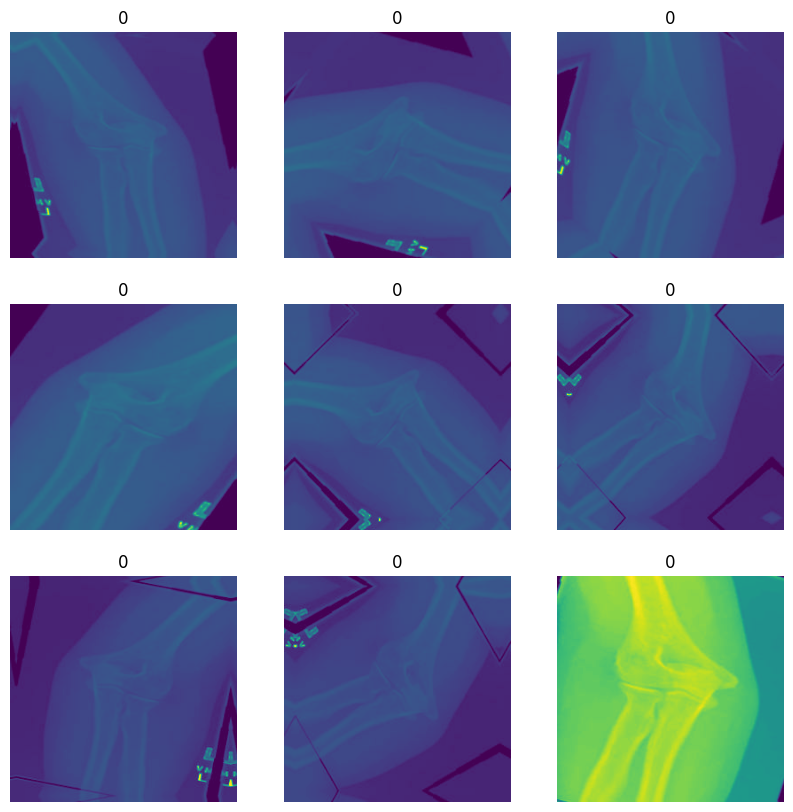

In [33]:
#display some original images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(augmented_train_ds.take(9)):
    label_1 = int(label)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label_1)
    plt.axis("off")

In [34]:
import datetime
print("Last modified: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S") + "\n")

Last modified:  25/03/2024 10:06:27
